# 套件版本

In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
from keras.utils import np_utils
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
fr.__version__

'1.9.6'

In [3]:
fr.version()

platform          : win32
conda             : 4.5.5
jupyter notebook  : 5.0.0
Python            : 3.6.3 
numpy             : 1.16.0
pandas            : 0.20.3
matplotlib        : 2.2.2
sklearn           : 0.19.1
tensorflow        : 1.12.0
keras             : 2.1.3
cv2               : 3.4.0
dlib              : 19.6.1
facerecognition   : 1.9.6


# 人臉數據庫收集

In [4]:
# fr.photograph_face(sample_name='sample0_face', film=0, save_size=224)

In [5]:
# fr.photograph_face(sample_name='sample1_face', film=0, save_size=224)

In [6]:
# fr.photograph_face(sample_name='sample2_face', film=0, save_size=224)

In [7]:
# fr.photograph_face(sample_name='sample3_face', film=0, save_size=224)

In [8]:
# fr.photograph_face(sample_name='sample4_face', film=0, save_size=224)

In [9]:
# fr.photograph_face(sample_name='sample5_face', film=0, save_size=224)

In [10]:
# fr.photograph_face(sample_name='sample6_face', film=0, save_size=224)

In [11]:
# fr.photograph_face(sample_name='sample7_face', film=0, save_size=224)

In [12]:
fr.extract_face(sample='sample0_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [13]:
fr.extract_face(sample='sample1_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [4]:
fr.extract_face(sample='sample2_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [4]:
fr.extract_face(sample='sample3_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [4]:
fr.extract_face(sample='sample4_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [ ]:
fr.extract_face(sample='sample5_face', number=10000, film=0, view_number=1000, face_direction=0)

In [ ]:
fr.extract_face(sample='sample6_face', number=10000, film=0, view_number=1000, face_direction=0)

In [15]:
fr.extract_face(sample='sample7_face', number=10000, film=0, view_number=1000, face_direction=0)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [18]:
# 檢查圖片

# 資料預處理

In [11]:
# 寫入sample_name.txt

In [12]:
name_dict, number_of_samples=fr.get_name_dict()

In [13]:
name_dict

{'sample0': '羅國峰',
 'sample1': '鄧景懋',
 'sample2': '李維揚',
 'sample3': '陳思源',
 'sample4': '王廣靖'}

### 分割數據

In [6]:
fr.train_validation_test_split(tt_split_ratio=0.02, tv_split_ratio=0.1)

--------------------------------------------------------------------------------
|                                                              |               |
|              sample_train_validation                         |  sample_test  |
|                                                              |               |
--------------------------------------------------------------------------------
sample0_train_validation: 9800 					sample0_test: 200
sample1_train_validation: 9800 					sample1_test: 200
sample2_train_validation: 9800 					sample2_test: 200
sample3_train_validation: 9800 					sample3_test: 200
sample4_train_validation: 9800 					sample4_test: 200

--------------------------------------------------------------------------------
|                                      |                       |               |
|              sample_train            |  sample_validation    |  sample_test  |
|                                      |                       |               |


### 資料增強

In [15]:
fr.data_augmentation(numbers=2)

sample0_face共增加了128筆資料
sample1_face共增加了128筆資料
sample2_face共增加了128筆資料


In [16]:
# 複製到sample0_face後刪除sample0_face+

### 資料標準化

In [4]:
target_size = 224

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 44100 images belonging to 5 classes.
Found 4900 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


# 建立模型

### 一般CNN

In [9]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

input_shape = (target_size, target_size, 3)

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu', padding='same')) # Convolution
# model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same')) # Convolution
# model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
# model.add(BatchNormalization())
model.add(Flatten()) # Flattening
# model.add(BatchNormalization())

# model.add(Dense(128))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(128))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(number_of_samples))
# # model.add(BatchNormalization())
# model.add(Activation('softmax'))

model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               25690240  
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
__________

### vgg16(自己寫)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D

# input_shape = (80, 80, 3)

# model = Sequential([
#                     Conv2D(64, (3, 3), input_shape=input_shape, padding='same',activation='relu'),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(128, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(256, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(512, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(512, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Flatten(),
#                     Dense(512, activation='relu'),
#                     Dense(512, activation='relu'),
#                     Dense(10, activation='softmax')
#                     ])

# model.summary()   

### vgg16(keras.applications)

In [ ]:
# from keras.applications import VGG16
 
# vgg_conv = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(224, 224, 3))


### vgg16遷移學習

In [5]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
model = Sequential()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [10]:
for layer in vgg16_model.layers:
    model.add(layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
model.layers.pop()

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
model.add(Dense(number_of_samples, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy'])

# 載入模型

In [4]:
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


# 訓練模型

In [23]:
# https://keras.io/zh/models/sequential/
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [10]:
history = model.fit_generator(
                              training_set, 
                              steps_per_epoch=10,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_set,
                              validation_steps=10,
                              shuffle=True
                             )

Epoch 1/20
10/10 [==============================] - 11s 1s/step - loss: 4.4131 - acc: 0.2100 - val_loss: 1.5566 - val_acc: 0.4300
Epoch 2/20
10/10 [==============================] - 9s 931ms/step - loss: 1.5001 - acc: 0.3600 - val_loss: 1.3001 - val_acc: 0.4700
Epoch 3/20
10/10 [==============================] - 10s 1s/step - loss: 1.0231 - acc: 0.6200 - val_loss: 0.5810 - val_acc: 0.8200
Epoch 4/20
10/10 [==============================] - 10s 1s/step - loss: 0.3257 - acc: 0.9300 - val_loss: 0.0779 - val_acc: 0.9900
Epoch 5/20
10/10 [==============================] - 10s 1s/step - loss: 0.0945 - acc: 0.9600 - val_loss: 0.1312 - val_acc: 0.9400
Epoch 6/20
10/10 [==============================] - 10s 1s/step - loss: 0.1334 - acc: 0.9500 - val_loss: 0.0222 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 9s 941ms/step - loss: 0.0229 - acc: 1.0000 - val_loss: 0.1222 - val_acc: 0.9500
Epoch 8/20
10/10 [==============================] - 10s 1s/step - loss: 0.0151 - acc: 

In [10]:
# history = model.fit_generator(
#                               training_set,
#                               steps_per_epoch = 3,
#                               nb_epoch=5,
#                               verbose = 1,
#                               validation_data = validation_set,
#                               nb_val_samples=3,
#                               shuffle=True,
#                               )

# 驗證曲線

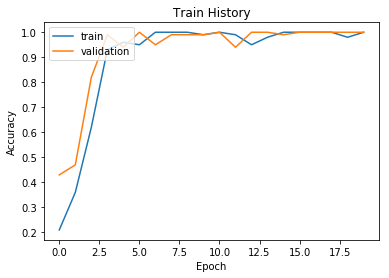

In [14]:
fr.show_acc_history(history=history, save_name="acc.jpg")

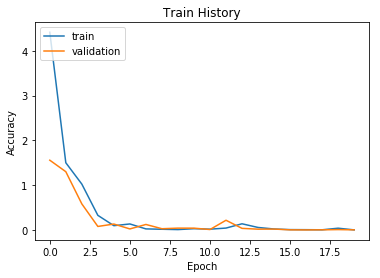

In [15]:
fr.show_loss_history(history=history, save_name="loss.jpg")

# 評估模型

In [5]:
fr.evaluation_model(model=model, target_size=224)

Found 1000 images belonging to 5 classes.
0.998


predict,李維揚,王廣靖,羅國峰,鄧景懋,陳思源
label,,,,,
李維揚,200,0,0,0,0
王廣靖,0,200,0,0,0
羅國峰,0,0,200,0,0
鄧景懋,0,1,0,198,1
陳思源,0,0,0,0,200


# 混淆矩陣

In [8]:
fr.crosstab(model=model, target_size=224)

Found 1000 images belonging to 5 classes.


predict,李維揚,王廣靖,羅國峰,鄧景懋,陳思源
label,,,,,
李維揚,200,0,0,0,0
王廣靖,0,200,0,0,0
羅國峰,0,0,200,0,0
鄧景懋,1,1,0,197,1
陳思源,0,0,0,0,200


# 儲存模型

In [16]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/facerecognition.hd5')
print("Saved model to disk")

Saved model to disk


# 模型預測

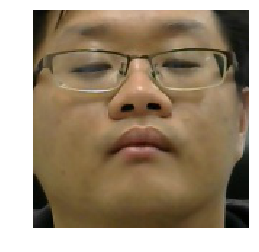

羅國峰            的機率為: 0.0006711952155455947
鄧景懋            的機率為: 0.8141955733299255
李維揚            的機率為: 0.00016554570174776018
陳思源            的機率為: 0.18495234847068787
王廣靖            的機率為: 1.538128526590299e-05

預測結果為: 鄧景懋(0.8141955733299255%)


In [5]:
fr.predict(model=model, img=r'temporarily.jpg', target_size=224)

# 人臉辨識系統

### 載入模型

In [14]:
name_dict, number_of_samples=fr.get_name_dict()
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!")

載入模型成功!繼續訓練模型


### 基於深度學習的人臉辨識

In [35]:
fr.cnn_face_recognition_everyone(model=model, pro_threshold=0.9, film=0, target_size=224, face_direction=0)

In [6]:
fr.cnn_face_recognition(model=model, pro_threshold=0.9, film=0, target_size=224, face_direction=0)

In [7]:
fr.cnn_face_recognition_system(model=model, pro_threshold=0.9, film=0, target_size=224, face_direction=0, catch_times=10)

### 基於直方圖的人臉辨識

In [4]:
fr.histogram_face_recognition(rms_threshold=100, film=0, txt='sample_name.txt', face_direction=0)

In [9]:
fr.histogram_face_recognition_system(rms_threshold=100, film=0, txt='sample_name.txt', face_direction=0, catch_times=10)

### 深度學習結合直方圖的人臉辨識

In [13]:
# BGR顏色
# Cyan-Blue Azure ( 75, 139, 190)
# Lapis Lazuli    ( 48, 105, 152)
# Shandy          (255, 232, 115)
# Sunglow         (255, 212,  59)
# Granite Gray    (100, 100, 100)
# Ggreen          (  0, 255,   0)
# Red             (  0,   0, 255)
# White           (255, 255, 255)

###### 深度學習與直方圖預測相同時

In [6]:
fr.face_recognition_system_0(model=model, pro_threshold=0.9, rms_threshold = 150,film=0,
                          txt='sample_name.txt', target_size=224,catch_times=1000, 
                          face_direction=0, box=True, other_show=True,
                          true_rectangle_BGR=(115, 232, 255),true_putText_BGR=(115, 232, 255),
                          false_rectangle_BGR=(190, 139, 75),false_putText_BGR=(190, 139, 75))

In [12]:
fr.face_recognition_system_0(model=model, pro_threshold=0.9, rms_threshold = 100,film=0,
                             txt='sample_name.txt', target_size=224,catch_times=10, 
                             face_direction=0, box=True, other_show=False,
                          true_rectangle_BGR=(115, 232, 255),true_putText_BGR=(115, 232, 255),
                          false_rectangle_BGR=(190, 139, 75),false_putText_BGR=(190, 139, 75))

###### 深度學習預測直方圖塞選

In [15]:
fr.face_recognition_system_1_demo(model=model, pro_threshold=0.9, rms_threshold = 150, 
                                  film=0, txt='sample_name.txt', target_size=224,
                                  show_message_time_ms=3000, face_direction=0, box=True, other_show=True,
                                  show_localtime=True,
                                  true_rectangle_BGR=(115, 232, 255), true_putText_BGR=(115, 232, 255),
                                  false_rectangle_BGR=(115, 232, 255), false_putText_BGR=(115, 232, 255),
                                  show_localtime_BGR=(115, 232, 255))

In [22]:
fr.face_recognition_system_1(model=model, pro_threshold=0.8, rms_threshold=150, film=0,
                             txt='sample_name.txt', target_size=224, catch_times=3, show_message_time_ms=3000,
                             face_direction=0, box=True, other_show=True, show_localtime=True,
                             true_rectangle_BGR=(115, 232, 255), true_putText_BGR=(115, 232, 255),
                             false_rectangle_BGR=(190, 139, 75), false_putText_BGR=(190, 139, 75),
                             show_localtime_BGR=(190, 139, 75))

In [24]:
fr.face_recognition_system_1(model=model, pro_threshold=0.8, rms_threshold=150, film=0,
                             txt='sample_name.txt', target_size=224, catch_times=5, show_message_time_ms=3000,
                             face_direction=0, box=False, other_show=True, show_localtime=True,
                             true_rectangle_BGR=(115, 232, 255), true_putText_BGR=(115, 232, 255),
                             false_rectangle_BGR=(190, 139, 75), false_putText_BGR=(190, 139, 75),
                             show_localtime_BGR=(190, 139, 75))

###### 直方圖預測深度學習塞選

In [ ]:
# fr.face_recognition_system_2(model=model, pro_threshold=0.9, rms_threshold = 100, 
#                                         film=0, txt='sample_name.txt', target_size=224, 
#                                         catch_times=10, face_direction=0, box=True)

### 準確率

In [41]:
fr.face_recognition_accuracy(model=model, pro_threshold=0.6, rms_threshold = 150, target_size=224)

已處理   	:10%

<<演算法一>>
已偵測出  	:41張人臉
已正確辨識出	:41張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.5061728395061729

<<演算法二>>
已偵測出  	:79張人臉
已正確辨識出	:78張人臉
達到門檻值數據所得的準確率為:0.9873417721518988
所有數據所得的準確率為   	:0.9629629629629629

<<演算法三>>
已偵測出  	:41張人臉
已正確辨識出	:41張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.5061728395061729

已處理   	:20%

<<演算法一>>
已偵測出  	:77張人臉
已正確辨識出	:77張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.47530864197530864

<<演算法二>>
已偵測出  	:158張人臉
已正確辨識出	:151張人臉
達到門檻值數據所得的準確率為:0.9556962025316456
所有數據所得的準確率為   	:0.9320987654320988

<<演算法三>>
已偵測出  	:77張人臉
已正確辨識出	:77張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.47530864197530864

已處理   	:30%

<<演算法一>>
已偵測出  	:143張人臉
已正確辨識出	:143張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.588477366255144

<<演算法二>>
已偵測出  	:239張人臉
已正確辨識出	:232張人臉
達到門檻值數據所得的準確率為:0.9707112970711297
所有數據所得的準確率為   	:0.9547325102880658

<<演算法三>>
已偵測出  	:143張人臉
已正確辨識出	:143張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.588477366255144

已處理   	:40%

<<演算法一>>
已偵測出  	:222張人臉
已正確辨識出	:222張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確

(1.0, 0.7525, 0.9912060301507538, 0.98625, 1.0, 0.7525)

In [42]:
fr.face_recognition_accuracy(model=model, pro_threshold=0.9, target_size=224)

已處理   	:10%

<<演算法一>>
已偵測出  	:59張人臉
已正確辨識出	:59張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7283950617283951

<<演算法二>>
已偵測出  	:80張人臉
已正確辨識出	:80張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.9876543209876543

<<演算法三>>
已偵測出  	:59張人臉
已正確辨識出	:59張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7283950617283951

已處理   	:20%

<<演算法一>>
已偵測出  	:103張人臉
已正確辨識出	:103張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.6358024691358025

<<演算法二>>
已偵測出  	:158張人臉
已正確辨識出	:154張人臉
達到門檻值數據所得的準確率為:0.9746835443037974
所有數據所得的準確率為   	:0.9506172839506173

<<演算法三>>
已偵測出  	:103張人臉
已正確辨識出	:103張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.6358024691358025

已處理   	:30%

<<演算法一>>
已偵測出  	:173張人臉
已正確辨識出	:173張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7119341563786008

<<演算法二>>
已偵測出  	:239張人臉
已正確辨識出	:235張人臉
達到門檻值數據所得的準確率為:0.9832635983263598
所有數據所得的準確率為   	:0.9670781893004116

<<演算法三>>
已偵測出  	:173張人臉
已正確辨識出	:173張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7119341563786008

已處理   	:40%

<<演算法一>>
已偵測出  	:252張人臉
已正確辨識出	:252張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.77

(1.0, 0.78875, 0.9949685534591195, 0.98875, 1.0, 0.78875)

In [43]:
fr.face_recognition_accuracy(model=model, target_size=224)

已處理   	:10%

<<演算法一>>
已偵測出  	:59張人臉
已正確辨識出	:59張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7283950617283951

<<演算法二>>
已偵測出  	:81張人臉
已正確辨識出	:80張人臉
達到門檻值數據所得的準確率為:0.9876543209876543
所有數據所得的準確率為   	:0.9876543209876543

<<演算法三>>
已偵測出  	:81張人臉
已正確辨識出	:60張人臉
達到門檻值數據所得的準確率為:0.7407407407407407
所有數據所得的準確率為   	:0.7407407407407407

已處理   	:20%

<<演算法一>>
已偵測出  	:103張人臉
已正確辨識出	:103張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.6358024691358025

<<演算法二>>
已偵測出  	:162張人臉
已正確辨識出	:155張人臉
達到門檻值數據所得的準確率為:0.9567901234567902
所有數據所得的準確率為   	:0.9567901234567902

<<演算法三>>
已偵測出  	:162張人臉
已正確辨識出	:104張人臉
達到門檻值數據所得的準確率為:0.6419753086419753
所有數據所得的準確率為   	:0.6419753086419753

已處理   	:30%

<<演算法一>>
已偵測出  	:173張人臉
已正確辨識出	:173張人臉
達到門檻值數據所得的準確率為:1.0
所有數據所得的準確率為   	:0.7119341563786008

<<演算法二>>
已偵測出  	:243張人臉
已正確辨識出	:236張人臉
達到門檻值數據所得的準確率為:0.9711934156378601
所有數據所得的準確率為   	:0.9711934156378601

<<演算法三>>
已偵測出  	:243張人臉
已正確辨識出	:174張人臉
達到門檻值數據所得的準確率為:0.7160493827160493
所有數據所得的準確率為   	:0.7160493827160493

已處理   	:40%

<<演算法一>>
已偵測出  	:2

(1.0, 0.79, 0.99125, 0.99125, 0.79125, 0.79125)

In [6]:
fr.supplement_extract_face(model=model, supplement_sample="supplement_sample0_face", film=0, txt='sample_name.txt', 
                           target_size=224, face_direction=0, save_format="jpg", 
                           start_n=10000, number=1000, view_number=100,
                           true_rectangle_BGR=(0, 255, 0) , true_putText_BGR=(255, 255, 255),
                           false_rectangle_BGR=(0, 0, 255), false_putText_BGR=(255, 255, 255))

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取300張人臉圖片
已擷取400張人臉圖片
已擷取500張人臉圖片
已擷取600張人臉圖片
已擷取700張人臉圖片
已擷取800張人臉圖片
已擷取900張人臉圖片
已擷取1000張人臉圖片
已擷取1000張人臉樣本


In [6]:
fr.supplement_extract_face(model=model, supplement_sample="supplement_sample1_face", film=0, txt='sample_name.txt', 
                           target_size=224, face_direction=0, save_format="jpg", 
                           start_n=10000, number=1000, view_number=100,
                           true_rectangle_BGR=(0, 255, 0) , true_putText_BGR=(255, 255, 255),
                           false_rectangle_BGR=(0, 0, 255), false_putText_BGR=(255, 255, 255))

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取300張人臉圖片
已擷取400張人臉圖片
已擷取500張人臉圖片
已擷取600張人臉圖片
已擷取700張人臉圖片
已擷取800張人臉圖片
已擷取900張人臉圖片
已擷取1000張人臉圖片
已擷取1000張人臉樣本


In [5]:
fr.supplement_extract_face(model=model, supplement_sample="supplement_sample2_face", film=0, txt='sample_name.txt', 
                           target_size=224, face_direction=0, save_format="jpg", 
                           start_n=10000, number=1000, view_number=100,
                           true_rectangle_BGR=(0, 255, 0) , true_putText_BGR=(255, 255, 255),
                           false_rectangle_BGR=(0, 0, 255), false_putText_BGR=(255, 255, 255))

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取300張人臉圖片
已擷取400張人臉圖片
已擷取500張人臉圖片
已擷取600張人臉圖片
已擷取700張人臉圖片
已擷取800張人臉圖片
已擷取900張人臉圖片
已擷取1000張人臉圖片
已擷取1000張人臉樣本


In [5]:
fr.supplement_extract_face(model=model, supplement_sample="supplement_sample3_face", film=0, txt='sample_name.txt', 
                           target_size=224, face_direction=0, save_format="jpg", 
                           start_n=10000, number=1000, view_number=100,
                           true_rectangle_BGR=(0, 255, 0) , true_putText_BGR=(255, 255, 255),
                           false_rectangle_BGR=(0, 0, 255), false_putText_BGR=(255, 255, 255))

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取300張人臉圖片
已擷取400張人臉圖片
已擷取500張人臉圖片
已擷取600張人臉圖片
已擷取700張人臉圖片
已擷取800張人臉圖片
已擷取900張人臉圖片
已擷取1000張人臉圖片
已擷取1000張人臉樣本


In [ ]:
fr.supplement_extract_face(model=model, supplement_sample="supplement_sample4_face", film=0, txt='sample_name.txt', 
                           target_size=224, face_direction=0, save_format="jpg", 
                           start_n=10000, number=1000, view_number=100,
                           true_rectangle_BGR=(0, 255, 0) , true_putText_BGR=(255, 255, 255),
                           false_rectangle_BGR=(0, 0, 255), false_putText_BGR=(255, 255, 255))